In [7]:
import numpy as np
import pandas as pd
import math as mt
from numpy import linalg as li
import matplotlib.pyplot as plt


In [8]:
"""
Receives data point x and coefficient parameter values w 
Returns the predicted label yhat, according to logistic regression.
"""
def predict(x, w):
    """
      TODO
    """
    score = np.dot(x, w)
    yhat = 1.0 / (1.0 + np.exp(-score))
    return(yhat)

In [9]:
"""
Receives data point (x), data label (y), and coefficient parameter values (w) 
Computes and returns the gradient of negative log likelihood at point (x)
"""
def gradient(x, y, w):
    """
      TODO
    """
    score = np.dot(x, w)
    grad = np.sum(y * score - np.log(1 + np.exp(score)))
    return(grad)

In [10]:
"""
Receives the predicted labels (y_hat), and the actual data labels (y)
Computes and returns the cross-entropy loss
"""
def cross_entropy(y_hat, y):
    """
      TODO
    """
    cross_ent = yhat - y
    return(cross_ent)

In [84]:
"""
Receives data set (X), dataset labels (y), learning rate (step size) (psi),
stopping criterion (for change in norm of ws) (epsilon), and maximum number of
epochs (max_epochs)
Computes and returns the vector of coefficient parameters (w),
and the list of cross-entropy losses for all epochs (cross_ent)
"""
def logisticRegression_SGA(X, y, psi, epsilon, max_epochs):
    """
      TODO
      NOTE: remember to either shuffle the data points or select data points
      randomly in each internal iteration.
      NOTE: stopping criterion: stop iterating if norm of change
      in w (norm(w-w_old)) is less than epsilon, or the number of epochs
      (iterations over the whole dataset) is more than maximum number of epochs
    """
    cross_ent = []
    
    # Suffle the data before starting
    per = np.random.permutation(len(X))
    y = y[per]
    ind = 0 # Index of current batch starts from zero
    w = np.zeros(X.shape[1]) # Defining initial weights as zero with shape of input data
    
    for l in range(max_epochs): # Loop until max epochs reach
        # we will make prediction based on our predict funciton that we have defined above
        wTemp = w
        pred = predict(X, w)
        
        cross_ent = y - pred

        grad = gradient(X, y, w)

        w += psi * grad
        cond = np.sqrt((w - wTemp) ** 2)
        print("Condition",cond)
#         if (np.sqrt((w - wTemp) ** 2) > epsilon):
#             print("Norm is greater than Epsilon")
#             break
        # computing
#        w[l] = w[l] + psi * ()
    return(w,cross_ent)

In [85]:
## initializations and config
psi=0.1 # learning rate or step size
epsilon = 10 # used in SGA's stopping criterion to define the minimum change in norm of w
max_epochs = 8 # used in SGA's stopping criterion to define the maximum number of epochs (iterations) over the whole dataset

## loading the data
df_train = pd.read_csv("cancer-data-text.csv", header=None)
df_test = pd.read_csv("cancer-data-train.csv", header=None)

## split into features and labels
X_train, y_train = df_train.iloc[:, :-1], df_train.iloc[:, -1].astype("category").cat.codes #Convert string labels to numeric
X_test, y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1].astype("category").cat.codes

## augmenting train data with 1 (X0)
X_train.insert(0,'',1)
X_test.insert(0,'',1)

In [86]:
X_train

0      1       2       3        4        5         6        7  \
0    1  21.090  26.57  142.70  1311.0  0.11410  0.28320  0.248700  0.14960   
1    1  15.190  13.21   97.65   711.8  0.07963  0.06934  0.033930  0.02657   
2    1  11.700  19.11   74.33   418.7  0.08814  0.05253  0.015830  0.01148   
3    1  14.050  27.15   91.38   600.4  0.09929  0.11260  0.044620  0.04304   
4    1  12.810  13.06   81.29   508.8  0.08739  0.03774  0.009193  0.01330   
..  ..     ...    ...     ...     ...      ...      ...       ...      ...   
104  1  12.630  20.76   82.15   480.4  0.09933  0.12090  0.106500  0.06021   
105  1  12.770  22.47   81.72   506.3  0.09055  0.05761  0.047110  0.02704   
106  1  15.500  21.08  102.90   803.1  0.11200  0.15710  0.152200  0.08481   
107  1  11.510  23.93   74.52   403.5  0.09261  0.10210  0.111200  0.04105   
108  1   9.731  15.34   63.78   300.2  0.10720  0.15990  0.410800  0.07857   

          8  ...     20     21      22      23      24       25       26  \
0    0.2395  ...  26.68  33.48  176.50  2089.0  0.1491  0.75840  0.67800   
1    0.1721  ...  16.20  15.73  104.50   819.1  0.1126  0.17370  0.13620   
2    0.1936  ...  12.61  26.55   80.92   483.1  0.1223  0.10870  0.07915   
3    0.1537  ...  15.30  33.17  100.20   706.7  0.1241  0.22640  0.13260   
4    0.1466  ...  13.63  16.15   86.70   570.7  0.1162  0.05445  0.02758   
..      ...  ...    ...    ...     ...     ...     ...      ...      ...   
104  0.1735  ...  13.33  25.47   89.00   527.4  0.1287  0.22500  0.22160   
105  0.1585  ...  14.49  33.37   92.04   653.6  0.1419  0.15230  0.21770   
106  0.2085  ...  23.17  27.65  157.10  1748.0  0.1517  0.40020  0.42110   
107  0.1388  ...  12.48  37.16   82.28   474.2  0.1298  0.25170  0.36300   
108  0.2548  ...  11.02  19.49   71.04   380.5  0.1292  0.27720  0.82160   

          27      28       29  
0    0.29030  0.4098  0.12840  
1    0.08178  0.2487  0.06766  
2    0.05741  0.3487  0.06958  
3    0.10480  0.2250  0.08321  
4    0.03990  0.1783  0.07319  
..       ...     ...      ...  
104  0.11050  0.2226  0.08486  
105  0.09331  0.2829  0.08067  
106  0.21340  0.3003  0.10480  
107  0.09653  0.2112  0.08732  
108  0.15710  0.3108  0.12590  

[109 rows x 31 columns]

Condition [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Condition [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Condition [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Condition [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Condition [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Condition [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Condition [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Condition [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


<ipython-input-8-4a9eb9deb143>:10: RuntimeWarning: overflow encountered in exp
  yhat = 1.0 / (1.0 + np.exp(-score))


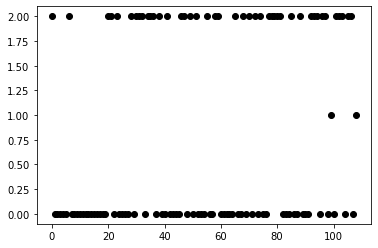

In [87]:
## learning logistic regression parameters
[w, cross_ent] = logisticRegression_SGA(X_train, y_train, psi, epsilon, max_epochs)


## plotting the cross-entropy across epochs to see how it changes
plt.plot(cross_ent, 'o', color='black');

In [83]:
print("Average Cross Entropy Error:", np.sum(cross_ent)/X_train.shape[0])

Average Cross Entropy Error: 0.8073394495412844


In [47]:
pred = []
cross_ent = []
for l in range(X_test.shape[1]): # Loop through all of test data
        # we will make prediction based on our predict funciton that we have defined above
        pred = predict(X_test, w)
        cross_ent = y_test - pred

<ipython-input-8-4a9eb9deb143>:10: RuntimeWarning: overflow encountered in exp
  yhat = 1.0 / (1.0 + np.exp(-score))


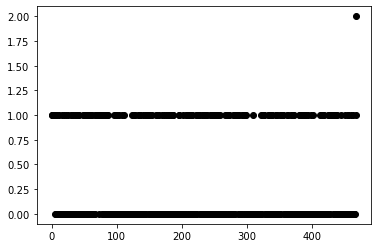

In [48]:
## plotting the cross-entropy across epochs to see how it changes
plt.plot(cross_ent, 'o', color='black');

In [49]:
print("Average Cross Entropy Error of Test Data:", np.sum(cross_ent)/X_test.shape[0])

Average Cross Entropy Error of Test Data: 0.373134328358209
